In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from IPython.display import Audio, display

def rick():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

rick()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [4]:
path = 'Data.csv'
# path = '/content/drive/MyDrive/Colab Notebooks/ML-Spring/Finnal-Project/Estimate/Data.csv'
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Company'], axis=1)
df.T

,0,1,2,3,4,5,6,7,8,9,...,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059
CPU Detail,Celeron,Core i7-Alder Lake,Alder Lake,M1,Core i5-Tiger Lake,Core i3,Core i5,Celeron,Core i5,Core i5,...,Ryzen 5,Core i7,Core i9-Alder Lake,Core i3,Core i7,Core i7,Ryzen 5,Core i7,Carrizo,Ryzen 7
CPU Manufacturer,Intel,Intel,Intel,Apple,Intel,Intel,Intel,intel,intel,intel,...,AMD,Intel,Intel,Intel,Intel,Intel,AMD,Intel,NaN,AMD
CPU Generation,NaN,12.0,12.0,NaN,10.0,11.0,NaN,NaN,NaN,10.0,...,NaN,13.0,12.0,12.0,11.0,10.0,NaN,13.0,6.0,6.0
CPU Arc,x86,x86,x86,M1,x86,x86,x86,x86,x86,x86,...,x86,x86,x86,x86,x86,x86,NaN,x86,NaN,NaN
Core,2.0,10.0,8.0,NaN,4.0,2.0,8.0,2.0,6.0,4.0,...,6.0,NaN,14.0,6.0,4.0,NaN,NaN,14.0,NaN,8.0
Cache,4.0,24.0,12.0,12.0,8.0,6.0,12.0,4.0,12.0,6.0,...,8.0,30.0,24.0,10.0,12.0,10.0,NaN,24.0,1.0,16.0
RAM,4.0,16.0,16.0,8.0,8.0,12.0,NaN,4.0,4.0,8.0,...,8.0,32.0,16.0,20.0,16.0,12.0,4.0,16.0,4.0,16.0
HDD,1000.0,NaN,NaN,NaN,NaN,1000.0,NaN,1000.0,NaN,NaN,...,NaN,NaN,NaN,1000.0,NaN,NaN,256.0,NaN,1000.0,NaN
SSD,NaN,512.0,512.0,256.0,512.0,256.0,512.0,128.0,512.0,256.0,...,256.0,1000.0,1000.0,NaN,1000.0,512.0,NaN,512.0,NaN,1000.0
Graphic-creator,NaN,NVIDIA,NaN,Apple,NVIDIA,NaN,NaN,NaN,NaN,NaN,...,AMD,NaN,NaN,Intel,Intel,Intel,NaN,NaN,AMD,NVIDIA


### Feature Enginearing By `Pipeline`

#### First of all, set the NaN values of columns below to zero:
`HDD`, `SSD`, `Blore screen`, `Keyboard light`, `Touch screen`
#### Give the most repetitive values in the columns below to the NaN values:
`Graphic-creator`, `CPU Generation`, `Core`, `Graphic RAM`, `Cache`, `RAM`,  `Battery houre`, `Battery Cells`, `Battery Capacity`, `Size per Inch`
#### Set the aouter value to NaN values of columns below:
`CPU Detail`, `CPU Manufacturer`, `CPU Arc`
#### Convert uppercase characters to lowercase for protection

In [5]:
numerical_columns = df.select_dtypes(exclude="object").drop('amount', axis=1).columns
categurical_columns = df.select_dtypes(exclude="float64").columns

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

class ZeroFill(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        force_to_zero = ['HDD', 'SSD', 'Blore screen', 'Keyboard light', 'Touch screen']

        for col in force_to_zero:
            x[col].fillna(0, inplace=True)
        return x

class ModeFill(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        get_mode = ['Graphic-creator', 'CPU Generation', 'Core', 'Graphic RAM',
                    'Cache', 'RAM',  'Battery houre', 'Battery Cells', 'Battery Capacity', 'Size per Inch/']

        target = 'amount'
        tmp = x.drop(target, axis=1)

        for _ in tmp:
            for col in get_mode:
                col_mode = x[col].mode()[0]
                x[col].fillna(col_mode, inplace=True)
        return x

class OutersideFit(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        outside = ['CPU Detail', 'CPU Manufacturer', 'CPU Arc']

        for col in outside:
            x[col].fillna('Unknone', inplace=True)
        return x

class SimpleClean(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def get_cpu(self, x):
        tmp = re.findall('^.*-', x)
        try:
          return tmp[0][0:len(tmp)-2]
        except:
          return x

    def simple_cpu_detail(self, x):

      result = map(self.get_cpu, x['CPU Detail'])

      result = list(result)
      result = np.array(result)

      x['CPU Detail'] = result

      return x

    def lower_dataset(self, df):
      for feature in categurical_columns:
        df[feature] = df[feature].apply(str.lower)

      return df


    def make_dataset_simple_clean(self, x):
      x = self.simple_cpu_detail(x)
      x = self.lower_dataset(x)
      # x = x.drop('Company', axis=1)
      return x

    def transform(self, x):

        return self.make_dataset_simple_clean(x)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold

first_level = Pipeline([
        ('Zero Fill', ZeroFill()),
        ('Mode Fill', ModeFill()),
        ('Outside Fill', OutersideFit())
])

second_level = Pipeline([
    ('Prepare Data', first_level),
    ('Clean Data', SimpleClean())
])

ndf = second_level.fit_transform(df)

target = 'amount'

y = ndf[target]
x = ndf.drop(target, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

box = ColumnTransformer(
    transformers=[
        ("numerical_step", StandardScaler(),
                ndf.select_dtypes(exclude="object").drop('amount', axis=1).columns),
        ("categurical_step", OneHotEncoder(handle_unknown="ignore"),
                ndf.select_dtypes(exclude="float64").columns)
    ]
)

box.fit_transform(x_train)

model = Pipeline([('preprocess', box), ('model', RandomForestRegressor())])

parameters = {
    'model__n_estimators':[10,50,100],
    'model__max_depth':[2, 10, 20, 40, 50],
    'model__criterion':['squared_error'],
    'model__min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9]
}

kfold = KFold(n_splits = 5)

grid_pipeline = GridSearchCV(model,parameters, n_jobs=10, cv=kfold)

grid_pipeline


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],...
                                                                        ('categurical_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=10,
             param_grid={'model__criterion': ['squared_error'],
                         'model__max_depth': [2, 10, 20, 40, 50],
                         'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [10, 50, 100]})

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def error_log(grid_object, x_train, y_train, x_test, y_test):

  # ------------------------------------ test

  print('\nerror on test data\n')

  y_pred = grid_object.predict(x_test)

  print('Mean absolute error %f' %(mean_absolute_error(y_test, y_pred)))
  print('Mean squared error %f' %(mean_squared_error(y_test, y_pred)))

  print('\n')

  # ------------------------------------ train

  print('\nerror on training data\n')

  y_pred = grid_object.predict(x_train)

  print('Mean absolute error %f' %(mean_absolute_error(y_train, y_pred)))
  print('Mean squared error %f' %(mean_squared_error(y_train, y_pred)))

  print('\n')

  # ------------------------------------ test

  print('Some sample on test data\n')

  tmp = list(y_test)
  y_pred = grid_object.predict(x_test)
  np.random.seed(13)

  for i in np.random.randint(low=0, high=y_test.shape[0], size=(10)):
      print('Sample %d th actual value: %f    predicted value: %f    %f' %(i, tmp[i], y_pred[i], (tmp[i]- y_pred[i])/tmp[i]*100))

  print('\n')

  # ------------------------------------ train

  print('\nSample from training data\n')

  tmp = list(y_train)
  tmp
  y_pred = grid_object.predict(x_train)

  np.random.seed(42)

  for i in np.random.randint(low=0, high=y_train.shape[0], size=(10)):
      print('Sample %d th actual value: %f    predicted value: %f    %f' %(i, tmp[i], y_pred[i], (tmp[i]- y_pred[i])/tmp[i]))

In [9]:
def plot_error_on_grids(grid_object, parameters, y_limit=1):

  ndf = pd.DataFrame(grid_object.cv_results_)
  fig, axes = plt.subplots(1, len(parameters),
                          figsize = (5*len(parameters), 5),
                          sharey='row')
  axes[0].set_ylabel("Score", fontsize=10)

  results = ['mean_score_time',
            'mean_test_score',
            'std_score_time',
            'std_test_score']
  cv = 5
  def pooled_var(stds):
      n = cv # size of each group
      return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

  lw=2

  for idx, (param_name, param_range) in enumerate(parameters.items()):
      grouped_df = ndf.groupby(f'param_{param_name}')[results]\
          .agg({'mean_score_time': 'mean',
                'mean_test_score': 'mean',
                'std_score_time': pooled_var,
                'std_test_score': pooled_var})
      previous_group = ndf.groupby(f'param_{param_name}')[results]
      axes[idx].set_xlabel(param_name, fontsize=15)
      axes[idx].set_ylim(0.0, y_limit)
      axes[idx].plot(param_range,
                  grouped_df['mean_score_time'],
                  label="Training score",
                  color="darkorange",
                  lw=lw)

  fig.suptitle('Validation curves', fontsize=20)
  fig.subplots_adjust(bottom=0.25, top=0.85)
  plt.show()

In [ ]:
np.random.seed(42)

grid_pipeline.fit(x_train,y_train)

print("Best: %f using %s" % (grid_pipeline.best_score_, grid_pipeline.best_params_))
rick()

Best: 0.794293 using {'model__criterion': 'squared_error', 'model__max_depth': 20, 'model__min_samples_split': 3, 'model__n_estimators': 50}


In [ ]:
error_log(grid_pipeline, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 10.408076
Mean squared error 311.920706



error on training data

Mean absolute error 5.340943
Mean squared error 91.076366


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 64.149097    2.360583
Sample 74 th actual value: 45.999000    predicted value: 59.819843    -30.045965
Sample 16 th actual value: 98.989000    predicted value: 89.692936    9.391007
Sample 98 th actual value: 57.000000    predicted value: 56.507242    0.864487
Sample 153 th actual value: 230.000000    predicted value: 167.220900    27.295261
Sample 154 th actual value: 20.500000    predicted value: 14.289177    30.296699
Sample 126 th actual value: 53.990000    predicted value: 53.602510    0.717707
Sample 74 th actual value: 45.999000    predicted value: 59.819843    -30.045965
Sample 73 th actual value: 36.979000    predicted value: 33.290033    9.975842
Sample 75 th actual value: 25.979000    predicted value: 27.071812    -4.206520



S

In [ ]:
kfold = KFold(n_splits = 8)

grid_pipeline = GridSearchCV(model,parameters, n_jobs=10, cv=kfold)

np.random.seed(42)

grid_pipeline.fit(x_train,y_train)

print("Best: %f using %s" % (grid_pipeline.best_score_, grid_pipeline.best_params_))
rick()

Best: 0.758314 using {'model__criterion': 'squared_error', 'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [ ]:
error_log(grid_pipeline, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 10.287013
Mean squared error 298.879294



error on training data

Mean absolute error 4.884538
Mean squared error 73.998858


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 64.488040    1.844688
Sample 74 th actual value: 45.999000    predicted value: 58.722724    -27.660870
Sample 16 th actual value: 98.989000    predicted value: 85.998184    13.123495
Sample 98 th actual value: 57.000000    predicted value: 54.419496    4.527199
Sample 153 th actual value: 230.000000    predicted value: 164.773860    28.359191
Sample 154 th actual value: 20.500000    predicted value: 14.513740    29.201268
Sample 126 th actual value: 53.990000    predicted value: 52.087841    3.523170
Sample 74 th actual value: 45.999000    predicted value: 58.722724    -27.660870
Sample 73 th actual value: 36.979000    predicted value: 32.666341    11.662455
Sample 75 th actual value: 25.979000    predicted value: 27.282750    -5.018476




In [ ]:
kfold = KFold(n_splits = 3)

grid_pipeline = GridSearchCV(model,parameters, n_jobs=10, cv=kfold)

np.random.seed(42)

grid_pipeline.fit(x_train,y_train)

print("Best: %f using %s" % (grid_pipeline.best_score_, grid_pipeline.best_params_))
rick()

Best: 0.727903 using {'model__criterion': 'squared_error', 'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 50}


In [ ]:
error_log(grid_pipeline, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 10.787777
Mean squared error 310.691825



error on training data

Mean absolute error 8.006957
Mean squared error 139.907016


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 63.207529    3.793716
Sample 74 th actual value: 45.999000    predicted value: 59.190130    -28.676992
Sample 16 th actual value: 98.989000    predicted value: 88.848928    10.243636
Sample 98 th actual value: 57.000000    predicted value: 61.885470    -8.571000
Sample 153 th actual value: 230.000000    predicted value: 163.987418    28.701123
Sample 154 th actual value: 20.500000    predicted value: 15.807574    22.889884
Sample 126 th actual value: 53.990000    predicted value: 60.673442    -12.379037
Sample 74 th actual value: 45.999000    predicted value: 59.190130    -28.676992
Sample 73 th actual value: 36.979000    predicted value: 30.445283    17.668724
Sample 75 th actual value: 25.979000    predicted value: 28.273390    -8.83171

Best: 0.799329 using {'model__criterion': 'squared_error', 'model__max_depth': 50, 'model__min_samples_split': 4, 'model__n_estimators': 100}


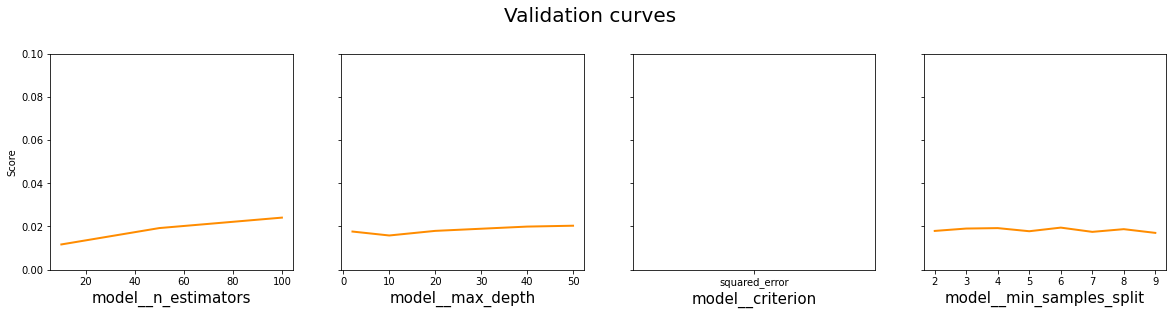

In [ ]:
kfold = KFold(n_splits = 5)

grid_pipeline = GridSearchCV(model,parameters, n_jobs=10, cv=kfold)

np.random.seed(42)

grid_pipeline.fit(x_train,y_train)

print("Best: %f using %s" % (grid_pipeline.best_score_, grid_pipeline.best_params_))

plot_error_on_grids(grid_pipeline, parameters, y_limit=0.1)

In [10]:
from sklearn.svm import SVR

model2 = Pipeline([('preprocess', box), ('model', SVR())])

kfold = KFold(n_splits = 10)

parameters2 = {
    'model__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'model__degree':[1, 2, 4, 8, 10, 12, 14],
    'model__gamma':['scale', 'auto'],
    'model__C':[0.01, 0.05, 0.1, 0.02, 0.5, 0.7, 0.9, 1.0]
}

grid_pipeline2 = GridSearchCV(model2, parameters2, cv=kfold)
grid_pipeline2

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],
      dtype='object')),
                                                                        ('categurical_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.01, 0.05, 0.1, 0.02, 0.5, 0.7, 0.9,
                                      1.0],
                         'model__degree': [1, 2, 4, 8, 10, 12, 14],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
np.random.seed(42)

grid_pipeline2.fit(x_train, y_train)

print("Best: %f using %s" % (grid_pipeline2.best_score_, grid_pipeline2.best_params_))
rick()

Best: 0.416532 using {'model__C': 1.0, 'model__degree': 1, 'model__gamma': 'scale', 'model__kernel': 'sigmoid'}


In [ ]:
error_log(grid_pipeline2, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 18.730754
Mean squared error 1082.158190



error on training data

Mean absolute error 20.132490
Mean squared error 1534.823215


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 59.566177    9.336108
Sample 74 th actual value: 45.999000    predicted value: 49.404714    -7.403886
Sample 16 th actual value: 98.989000    predicted value: 58.954403    40.443480
Sample 98 th actual value: 57.000000    predicted value: 53.637051    5.899910
Sample 153 th actual value: 230.000000    predicted value: 124.544176    45.850358
Sample 154 th actual value: 20.500000    predicted value: 41.371579    -101.812581
Sample 126 th actual value: 53.990000    predicted value: 53.105992    1.637354
Sample 74 th actual value: 45.999000    predicted value: 49.404714    -7.403886
Sample 73 th actual value: 36.979000    predicted value: 30.398969    17.793966
Sample 75 th actual value: 25.979000    predicted value: 25.995363    -0.06298

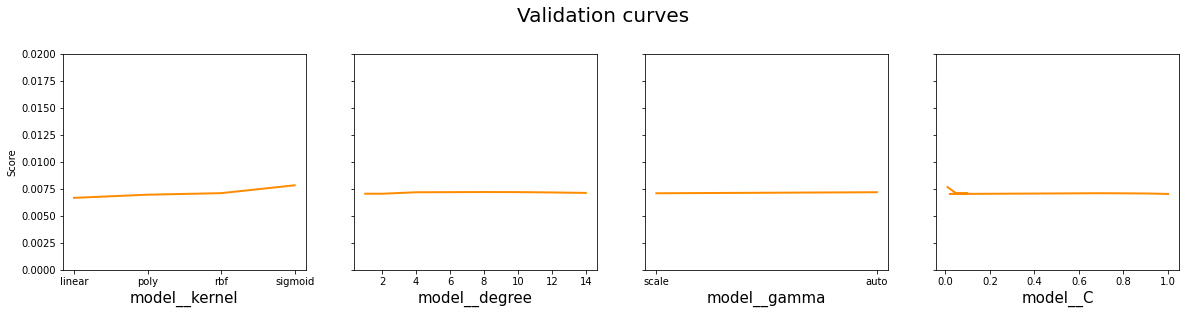

In [ ]:
plot_error_on_grids(grid_pipeline2, parameters2, y_limit=0.02)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = Pipeline([('preprocess', box), ('model', GradientBoostingRegressor())])

kfold = KFold(n_splits = 5)

parameters3 = {
    'model__loss':['squared_error'],
    'model__learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'model__n_estimators':[50, 70, 100],
    'model__max_depth':[3, 5, 7, 9],
    'model__random_state':[42],
    'model__max_features':[5, 10, 15]
}

grid_pipeline3 = GridSearchCV(model3, parameters3, cv=kfold)
grid_pipeline3

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1],
                         'model__loss': ['squared_error'],
                         'model__max_depth': [3, 5, 7, 9],
                         'model__max_features': [5, 10, 15],
                         'model__n_estimators': [50, 70, 100],
                         'model__random_state': [42]})

In [ ]:
np.random.seed(42)

grid_pipeline3.fit(x_train, y_train)

print("Best: %f using %s" % (grid_pipeline3.best_score_, grid_pipeline3.best_params_))
rick()

Best: 0.833090 using {'model__learning_rate': 0.1, 'model__loss': 'squared_error', 'model__max_depth': 7, 'model__max_features': 10, 'model__n_estimators': 100, 'model__random_state': 42}


In [ ]:
error_log(grid_pipeline3, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 11.025293
Mean squared error 353.102600



error on training data

Mean absolute error 4.628242
Mean squared error 49.203305


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 64.852502    1.289952
Sample 74 th actual value: 45.999000    predicted value: 50.636411    -10.081548
Sample 16 th actual value: 98.989000    predicted value: 68.314044    30.988247
Sample 98 th actual value: 57.000000    predicted value: 60.154003    -5.533339
Sample 153 th actual value: 230.000000    predicted value: 133.347962    42.022625
Sample 154 th actual value: 20.500000    predicted value: 18.823889    8.176151
Sample 126 th actual value: 53.990000    predicted value: 61.846778    -14.552284
Sample 74 th actual value: 45.999000    predicted value: 50.636411    -10.081548
Sample 73 th actual value: 36.979000    predicted value: 30.224040    18.267016
Sample 75 th actual value: 25.979000    predicted value: 25.525331    1.746290



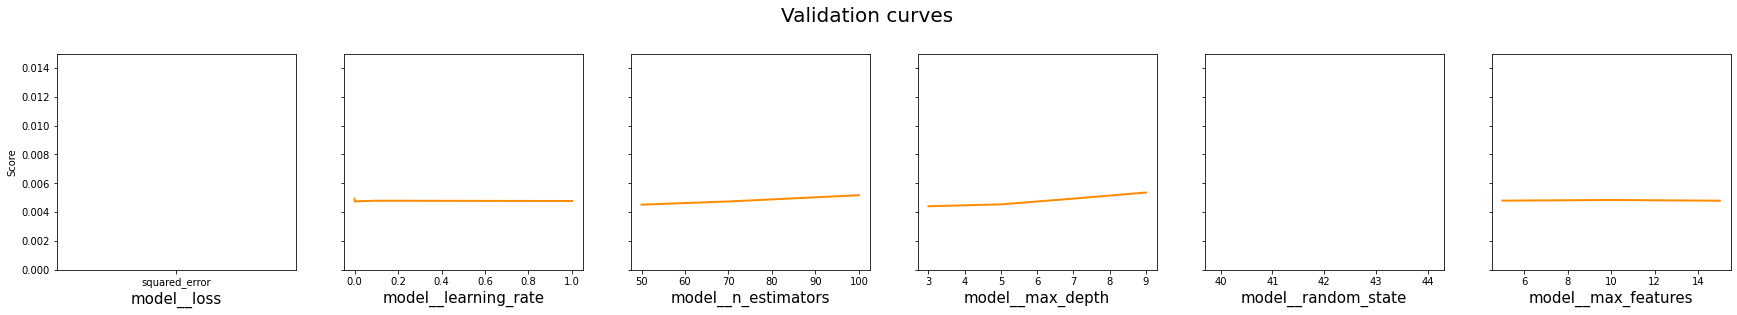

In [ ]:
plot_error_on_grids(grid_pipeline3, parameters3, y_limit=0.015)

In [12]:
from sklearn.linear_model import Ridge

model4 = Pipeline([('preprocess', box), ('model', Ridge())])

kfold = KFold(n_splits = 5)

parameters4 = {
    'model__alpha':[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
    'model__max_iter':[100, 500, 800],
    'model__solver':['auto', 'lsqr']
}

grid_pipeline4 = GridSearchCV(model4, parameters4, cv=kfold)
grid_pipeline4

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],
      dtype='object')),
                                                                        ('categurical_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
                         'model__max_iter': [100, 500, 800],
                         'model__solver': ['auto', 'lsqr']})

In [ ]:
np.random.seed(42)

grid_pipeline4.fit(x_train, y_train)
print("Best: %f using %s" % (grid_pipeline4.best_score_, grid_pipeline4.best_params_))
rick()

Best: -3.867733 using {'model__alpha': 1, 'model__max_iter': 100, 'model__solver': 'auto'}


In [ ]:
error_log(grid_pipeline4, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 16.398548
Mean squared error 590.100698



error on training data

Mean absolute error 16.547024
Mean squared error 714.318657


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 75.877474    -15.490828
Sample 74 th actual value: 45.999000    predicted value: 55.442121    -20.528970
Sample 16 th actual value: 98.989000    predicted value: 72.196923    27.065712
Sample 98 th actual value: 57.000000    predicted value: 60.825390    -6.711210
Sample 153 th actual value: 230.000000    predicted value: 261.388706    -13.647264
Sample 154 th actual value: 20.500000    predicted value: 30.159292    -47.118496
Sample 126 th actual value: 53.990000    predicted value: 64.119110    -18.761085
Sample 74 th actual value: 45.999000    predicted value: 55.442121    -20.528970
Sample 73 th actual value: 36.979000    predicted value: 29.431935    20.409056
Sample 75 th actual value: 25.979000    predicted value: 24.062694    7.3

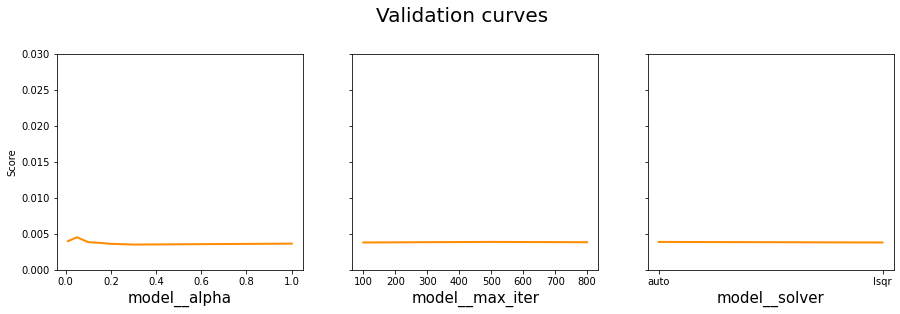

In [ ]:
plot_error_on_grids(grid_pipeline4, parameters4, y_limit=0.03)

In [13]:
from sklearn.linear_model import Lasso

model6 = Pipeline([('preprocess', box), ('model', Lasso())])

kfold = KFold(n_splits = 5)

parameters6 = {
    'model__alpha':[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
    'model__max_iter':[100, 500, 800],
}

grid_pipeline6 = GridSearchCV(model6, parameters6, cv=kfold)
grid_pipeline6

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],
      dtype='object')),
                                                                        ('categurical_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
                         'model__max_iter': [100, 500, 800]})

In [ ]:
np.random.seed(42)

grid_pipeline6.fit(x_train, y_train)
print("Best: %f using %s" % (grid_pipeline6.best_score_, grid_pipeline6.best_params_))
rick()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4252.104447399208, tolerance: 176.6823360151978
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 690.8048295679037, tolerance: 179.73485990333566
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085.5493666190887, tolerance: 196.83595655377422
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: Convergen

Best: -3.587451 using {'model__alpha': 0.1, 'model__max_iter': 100}


In [ ]:
error_log(grid_pipeline6, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 15.958418
Mean squared error 552.944954



error on training data

Mean absolute error 17.072909
Mean squared error 744.500584


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 75.473988    -14.876694
Sample 74 th actual value: 45.999000    predicted value: 55.783109    -21.270265
Sample 16 th actual value: 98.989000    predicted value: 73.503602    25.745686
Sample 98 th actual value: 57.000000    predicted value: 60.668973    -6.436795
Sample 153 th actual value: 230.000000    predicted value: 245.323901    -6.662566
Sample 154 th actual value: 20.500000    predicted value: 31.033434    -51.382603
Sample 126 th actual value: 53.990000    predicted value: 65.054748    -20.494069
Sample 74 th actual value: 45.999000    predicted value: 55.783109    -21.270265
Sample 73 th actual value: 36.979000    predicted value: 28.934579    21.754024
Sample 75 th actual value: 25.979000    predicted value: 24.609653    5.27

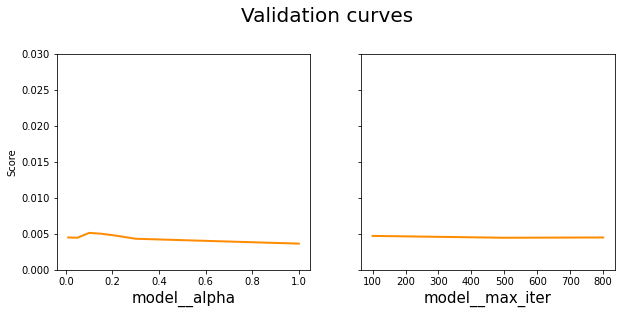

In [ ]:
plot_error_on_grids(grid_pipeline6, parameters6, y_limit=0.03)

In [14]:
import xgboost as xgb

model7 = Pipeline([('preprocess', box), ('model', xgb.XGBRegressor(objective="reg:linear", random_state=42))])

kfold = KFold(n_splits = 10)

parameters7 = {
    'model__booster':['gbtree', 'gblinear'],
    'model__eta':[0.1, 0.2, 0.3],
    'model__lambda':[1.0, 0.5, 0],
    'model__alpha':[1.0, 0.5, 0],
    'model__max_depth':[5, 6, 7, 8]
}

grid_pipeline7 = GridSearchCV(model7, parameters7, cv=kfold)
grid_pipeline7


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen']...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     objective='reg:linear',
                                                     predictor=None, ...))]),
             param_grid={'model__alpha': [1.0, 0.5, 0],
                         'model__booster': ['gbtree', 'gblinear'],
                         'model__eta': [0.1, 0.2, 0.3],
                         'model__lambda': [1.0, 0.5, 0],
                         'model__max_depth': [5, 6, 7, 8]})

In [ ]:
np.random.seed(42)

grid_pipeline7.fit(x_train, y_train)
print("Best: %f using %s" % (grid_pipeline7.best_score_, grid_pipeline7.best_params_))
rick()

[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:02] WARNING: ../src/objective/regression_

In [ ]:
error_log(grid_pipeline7, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 9.519689
Mean squared error 250.869535



error on training data

Mean absolute error 4.088020
Mean squared error 36.263032


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 71.806931    -9.295176
Sample 74 th actual value: 45.999000    predicted value: 46.911396    -1.983513
Sample 16 th actual value: 98.989000    predicted value: 104.380783    -5.446851
Sample 98 th actual value: 57.000000    predicted value: 59.155865    -3.782219
Sample 153 th actual value: 230.000000    predicted value: 229.150101    0.369521
Sample 154 th actual value: 20.500000    predicted value: 13.720634    33.070076
Sample 126 th actual value: 53.990000    predicted value: 54.809353    -1.517601
Sample 74 th actual value: 45.999000    predicted value: 46.911396    -1.983513
Sample 73 th actual value: 36.979000    predicted value: 31.489597    14.844649
Sample 75 th actual value: 25.979000    predicted value: 27.315546    -5.144717




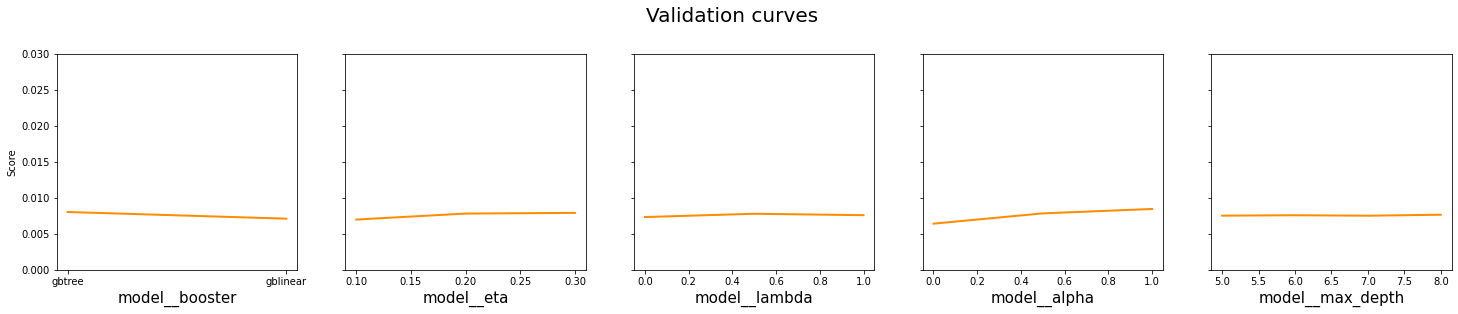

In [ ]:
plot_error_on_grids(grid_pipeline7, parameters7, y_limit=0.03)

In [11]:
from sklearn.preprocessing import MinMaxScaler

ndf2 = pd.get_dummies(ndf, columns=categurical_columns)

y = ndf2[target]
x = ndf2.drop(target, axis=1)

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape

(901, 101)

In [13]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42, alpha=0.5, booster='gbtree', eta='0.3', max_depth=5)

evalset = [(x_train, y_train), (x_test,y_test)]

model_xgb.fit(x_train, y_train, eval_metric='logloss', eval_set=evalset)

results = model_xgb.evals_result()

[08:36:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-logloss:-2304.49533	validation_1-logloss:-2242.10621
[1]	validation_0-logloss:-2335.52590	validation_1-logloss:-2272.38246
[2]	validation_0-logloss:-2350.76005	validation_1-logloss:-2286.92952
[3]	validation_0-logloss:-2359.64472	validation_1-logloss:-2295.27821


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:-2365.17339	validation_1-logloss:-2300.53450
[5]	validation_0-logloss:-2368.96071	validation_1-logloss:-2304.23242
[6]	validation_0-logloss:-2371.51897	validation_1-logloss:-2306.67344
[7]	validation_0-logloss:-2373.36439	validation_1-logloss:-2308.48836
[8]	validation_0-logloss:-2374.58704	validation_1-logloss:-2309.48002
[9]	validation_0-logloss:-2375.43873	validation_1-logloss:-2310.36506
[10]	validation_0-logloss:-2376.12407	validation_1-logloss:-2310.97510
[11]	validation_0-logloss:-2376.63572	validation_1-logloss:-2311.58859
[12]	validation_0-logloss:-2376.99796	validation_1-logloss:-2311.94640
[13]	validation_0-logloss:-2377.23350	validation_1-logloss:-2312.11170
[14]	validation_0-logloss:-2377.43296	validation_1-logloss:-2312.23684
[15]	validation_0-logloss:-2377.65891	validation_1-logloss:-2312.25557
[16]	validation_0-logloss:-2377.77652	validation_1-logloss:-2312.33980
[17]	validation_0-logloss:-2377.83665	validation_1-logloss:-2312.39265
[18]	validat

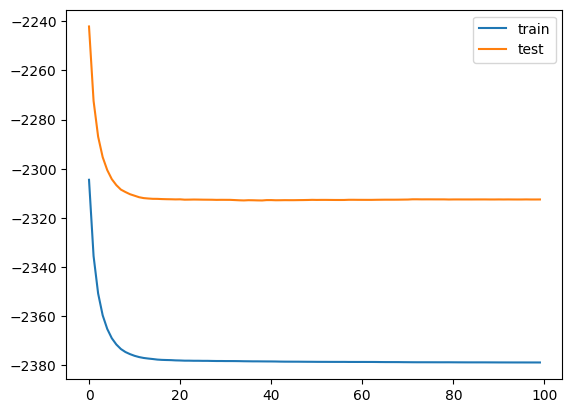

In [14]:
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [47]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax, Dropout
from tensorflow.keras.activations import relu, sigmoid, tanh
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.regularizers import l2

model = Sequential()

model.add(Dense(99, activation=relu, kernel_regularizer=l2(1e-1), bias_regularizer=l2(1e-1), input_shape=(101,)))
model.add(Dropout(0.5))
model.add(Dense(500, activation=relu, kernel_regularizer=l2(1e-1), bias_regularizer=l2(1e-1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation=relu, kernel_regularizer=l2(1e-4), bias_regularizer=l2(1e-4)))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 99)                10098     
                                                                 
 dropout_12 (Dropout)        (None, 99)                0         
                                                                 
 dense_19 (Dense)            (None, 500)               50000     
                                                                 
 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 501       
                                                                 
Total params: 60,599
Trainable params: 60,599
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='MeanSquaredError', metrics=['MeanSquaredError'])
tf.keras.losses.MeanSquaredError
early_stop = 32
earlyStop = EarlyStopping(monitor='val_loss', patience=early_stop, verbose=1, mode='auto')

check_point_name = 'best_weight.hdf5'
check_point = ModelCheckpoint(filepath = check_point_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=1000,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[earlyStop, check_point],
                    shuffle=True)
rick()

Epoch 1/1000
25/29 [========================>.....] - ETA: 0s - loss: 6043.4927 - mean_squared_error: 6017.2183
Epoch 1: val_loss improved from inf to 5348.87256, saving model to best_weight.hdf5
29/29 [==============================] - 2s 14ms/step - loss: 6064.8403 - mean_squared_error: 6038.5986 - val_loss: 5348.8726 - val_mean_squared_error: 5322.9365
Epoch 2/1000
25/29 [========================>.....] - ETA: 0s - loss: 5751.1035 - mean_squared_error: 5725.3579
Epoch 2: val_loss improved from 5348.87256 to 5282.05859, saving model to best_weight.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 6004.6919 - mean_squared_error: 5978.9688 - val_loss: 5282.0586 - val_mean_squared_error: 5256.5576
Epoch 3/1000
21/29 [====================>.........] - ETA: 0s - loss: 5722.0879 - mean_squared_error: 5696.7075
Epoch 3: val_loss improved from 5282.05859 to 5192.07080, saving model to best_weight.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 5925.1699 - me

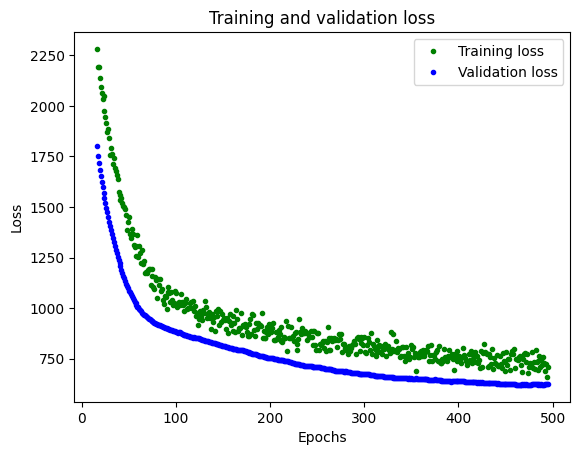

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

SKIP = 15
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
error_log(model, x_train, y_train, x_test, y_test)


error on test data

5/5 [==============================] - 0s 3ms/step
Mean absolute error 15.053456
Mean squared error 584.413056



error on training data

29/29 [==============================] - 0s 2ms/step
Mean absolute error 13.794905
Mean squared error 605.143136


Some sample on test data

5/5 [==============================] - 0s 3ms/step
Sample 82 th actual value: 65.700000    predicted value: 71.882622    -9.410388
Sample 74 th actual value: 45.999000    predicted value: 52.615620    -14.384267
Sample 16 th actual value: 98.989000    predicted value: 56.898216    42.520668
Sample 98 th actual value: 57.000000    predicted value: 58.353321    -2.374248
Sample 153 th actual value: 230.000000    predicted value: 271.137207    -17.885742
Sample 154 th actual value: 20.500000    predicted value: 26.638817    -29.945448
Sample 126 th actual value: 53.990000    predicted value: 57.471458    -6.448336
Sample 74 th actual value: 45.999000    predicted value: 52.615620    -14.384267
